In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadJson(path):
    f = open(path)
    data = json.load(f)
    f.close()
    return data

In [3]:
sign = loadJson("sign.json")

In [4]:
ids = []
signatures = []
for uuid in sign:
    ids.append(uuid)
    signatures.append(sign[uuid][2])
npSign = np.array(signatures)
print(npSign.shape)

(4742, 17)


In [5]:
ref = "68a31a0cf30411edb451b8aeed79c0cc"
refDiffSign = np.array(sign[ref][2])
mse = ((npSign - refDiffSign)**2).mean(axis=1)
sortedMse = mse.argsort()
best4Ids = sortedMse[:4] # Item itself is probably first
best3 = [ids[i] for i in best4Ids if ids[i] != ref][:3] # Remove item itself

In [6]:
def func(x, poly):
    return [sum([val**i * poly[i] for i in range(len(poly))]) for val in x]

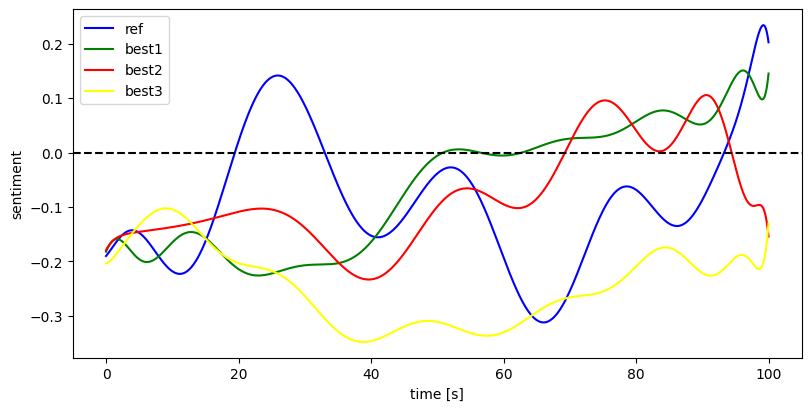

In [7]:
res = 1000
x = [i / res * 100 for i in range(res + 1)]
plt.figure(figsize=(8, 4), layout='constrained')
plt.plot(x, func(x, sign[ref][2]), color="blue", label="ref")
plt.plot(x, func(x, sign[best3[0]][2]), color="green", label="best1")
plt.plot(x, func(x, sign[best3[1]][2]), color="red", label="best2")
plt.plot(x, func(x, sign[best3[2]][2]), color="yellow", label="best3")
plt.axhline(y=0, color="black", linestyle='--')
plt.xlabel("time [s]")
plt.ylabel("sentiment")
plt.legend()

In [8]:
comp = []
res = 100
for poly in signatures:
    x = [i / res * 100 for i in range(res + 1)]
    comp.append(func(x, poly))
npComp = np.array(comp)

(4742, 101)


In [19]:
refId = ids.index(ref)
refDiffComp = np.array(comp[refId])
mseComp = ((npComp - refDiffComp)**2).mean(axis=1)
sortedMseComp = mseComp.argsort()
best4CompIds = [i for i in sortedMseComp[:4] if i != refId][:3] # Item itself is probably first

In [20]:
print(comp[refId])

[-0.1900470072368333, -0.1735738620793579, -0.15733862844893962, -0.14617900697574418, -0.14269966497207645, -0.14732033120689092, -0.1587258645787526, -0.1744669148446388, -0.19155759683439463, -0.2069855679798644, -0.21809682091655577, -0.2228478810512906, -0.21993634319380184, -0.20883027942024915, -0.18972071842763855, -0.16342121110154542, -0.13123600929491716, -0.09481472092906484, -0.056007250652070864, -0.016728910747002196, 0.0211578940409785, 0.05594188088483189, 0.08613969823711569, 0.11055162051427243, 0.12829745912864254, 0.13883460818244026, 0.14196038721379745, 0.1378008519029998, 0.1267881133836746, 0.10962801824198529, 0.08725985596387664, 0.06080962028197821, 0.03153827842796872, 0.0007865037189719037, -0.030082606098931486, -0.05974118863178901, -0.08695288489419972, -0.11062582190437675, -0.12986033351492665, -0.14398942939136683, -0.15261010183556056, -0.1556037485641184, -0.15314429636023874, -0.14569303344534035, -0.13397968786276948, -0.11896990586527068, -0.101

In [21]:
print(refId, best4CompIds)

823 [4463, 4139, 3644]


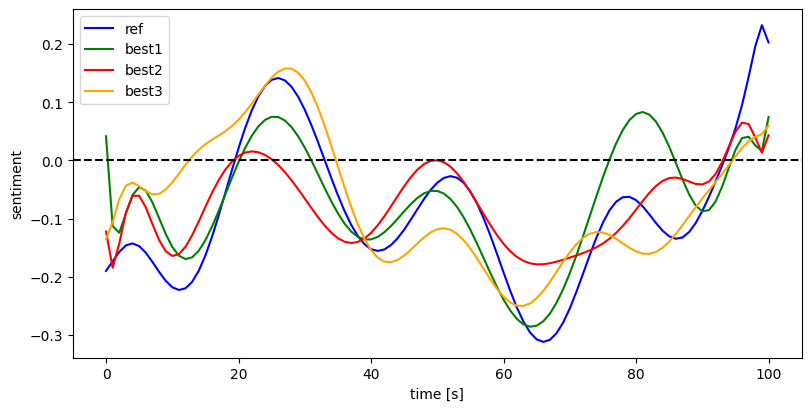

In [25]:
plt.figure(figsize=(8, 4), layout='constrained')
plt.plot(x, comp[refId], color="blue", label="ref")
plt.plot(x, comp[best4CompIds[0]], color="green", label="best1")
plt.plot(x, comp[best4CompIds[1]], color="red", label="best2")
plt.plot(x, comp[best4CompIds[2]], color="orange", label="best3")
plt.axhline(y=0, color="black", linestyle='--')
plt.xlabel("time [%]")
plt.ylabel("sentiment")
plt.legend()

In [33]:
filtered = loadJson("filtered.json")
moviesPerUuid = {}
for m in filtered:
    moviesPerUuid[m["uuid"]] = m

In [36]:
for mid in sortedMseComp[:10]:
    muuid = ids[mid]
    print("{title} ({year})".format(title=moviesPerUuid[muuid]["title"], year=moviesPerUuid[muuid]["year"]))

Interstellar (2014)
The Seagull (2018)
The Forest (2016)
Savannah (2013)
Dark Was the Night (2014)
Infestation (2009)
Black Friday (2004)
Beat (2000)
How to Lose Friends & Alienate People (2008)
I Am Number Four (2011)
